Import Packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Raed DataSet

In [78]:
df = pd.read_csv("TehraHouseing.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [79]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [80]:
print(df.dtypes)

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object


In [81]:
df["Parking"]= df["Parking"].astype("int16")
df["Warehouse"] = df["Warehouse"].astype("int16")
df["Elevator"] = df["Elevator"].astype("int16")
df["Price"] = df["Price"].astype("int64")
df["Price(USD)"] = df["Price(USD)"].astype("int64")
df["Room"] = df["Room"].astype("int16")

In [82]:
def remove_string(df):
    drops = 0
    for i, row in df.iterrows():
        area = row["Area"]
        try:
            int(area)
        except:
            df = df.drop(i)
            drops +=1
    print("Numbers of Drops : " , drops) 
    return df
        
df = remove_string(df)
df["Area"] = df["Area"].astype("int16")


Numbers of Drops :  6


In [83]:
print(df.dtypes)

Area           int16
Room           int16
Parking        int16
Warehouse      int16
Elevator       int16
Address       object
Price          int64
Price(USD)     int64
dtype: object


In [84]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3473.000000,3473.000000,3473.000000,3473.000000,3473.000000,3.473000e+03,3.473000e+03
mean,106.774547,2.079758,0.847970,0.914771,0.787504,5.354621e+09,1.784871e+05
std,69.365567,0.758764,0.359102,0.279262,0.409133,8.104058e+09,2.701353e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.415000e+09,4.716600e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.880000e+09,9.600000e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


In [85]:
print(df.shape)
df.isna().sum()


(3473, 8)


Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [86]:
df = df.dropna()
df.shape

(3450, 8)

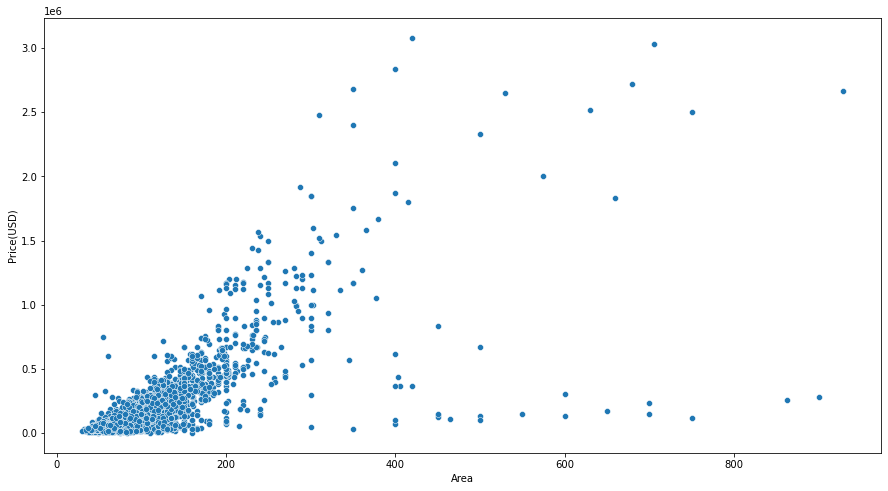

In [87]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df["Area"], df["Price(USD)"]);

,Parking,Warehouse,Elevator
0,2924,3157,2717
1,526,293,733


,0,1,2,3,4,5
Room,10,669,1938,730,70,33


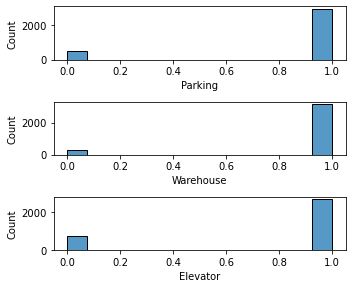

In [88]:
plt.figure(figsize=(5, 5))

pwe = pd.DataFrame([1, 0])
for k, i in enumerate(["Parking", "Warehouse", "Elevator"]):
    pwe.insert(loc=k+1, column=str(i),
               value=pd.DataFrame(df[i].value_counts()))
    plt.subplot(4, 1, k+1)
    sns.histplot(x=df[i])
plt.tight_layout()
r_dis = pd.DataFrame(df["Room"].value_counts()).T
display(pwe.drop(0 , axis=1),r_dis.reindex(sorted(r_dis.columns), axis=1) )


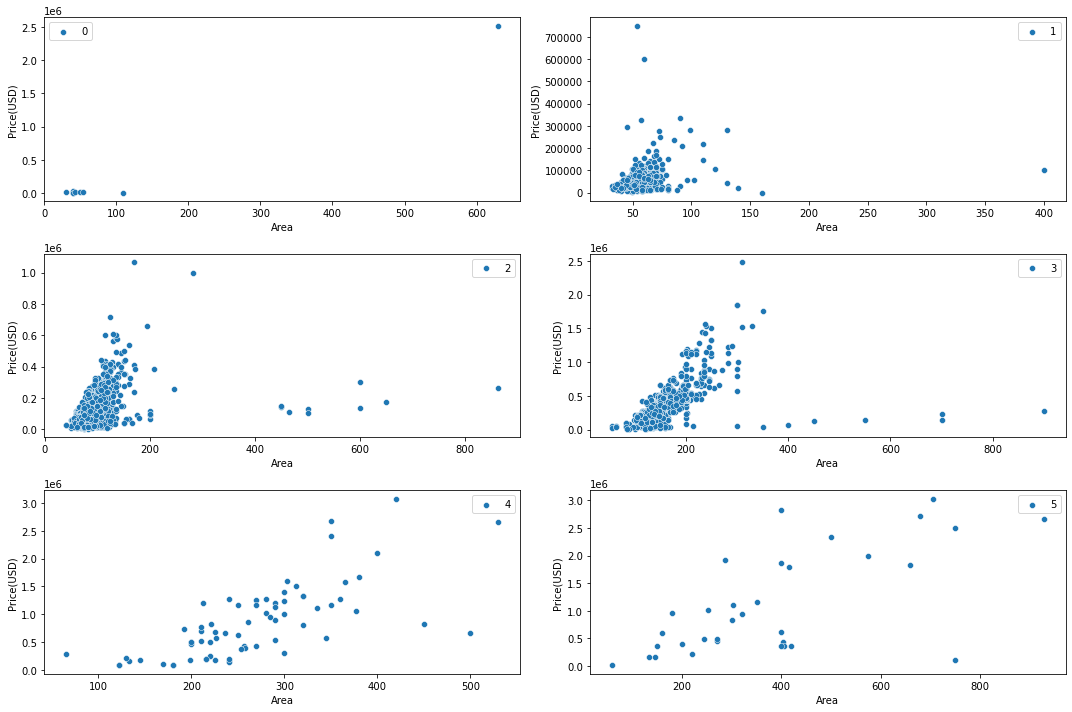

In [89]:
plt.figure(figsize=(15, 10))
for room in range(6):
    plt.subplot(3, 2, room+1)
    sns.scatterplot(df[df["Room"]==room]["Area"], df[df["Room"]==room]["Price(USD)"] , label = room)
plt.tight_layout();

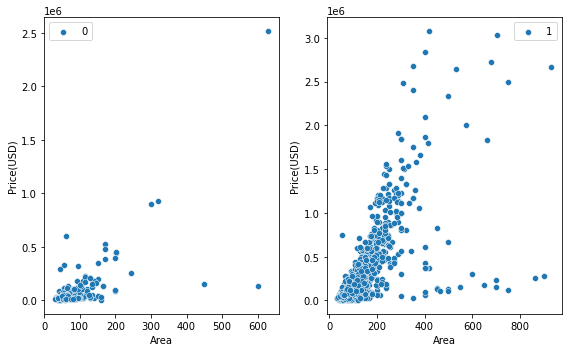

In [90]:
plt.figure(figsize=(8, 5))
for parking in range(2):
    plt.subplot(1, 2, parking+1)
    sns.scatterplot(df[df["Parking"]==parking]["Area"], df[df["Parking"]==parking]["Price(USD)"] , label = parking)
plt.tight_layout()

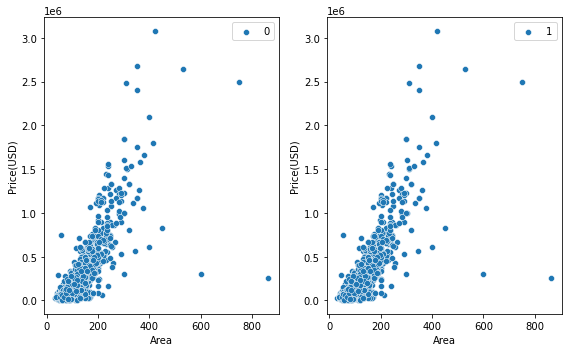

In [91]:
plt.figure(figsize=(8, 5))
for Elevator in range(2):
    plt.subplot(1, 2, Elevator+1)
    sns.scatterplot(df[df["Elevator"]==parking]["Area"], df[df["Elevator"]==parking]["Price(USD)"] , label = Elevator)
plt.tight_layout();

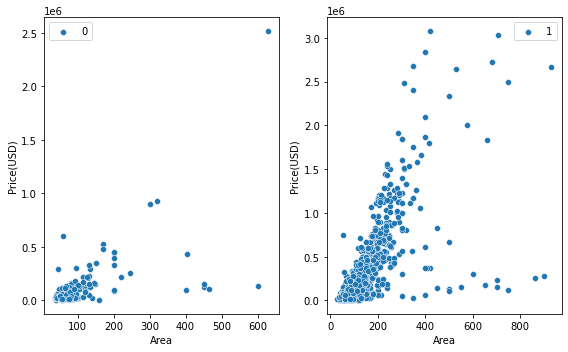

In [92]:
plt.figure(figsize=(8, 5))
for Warehouse in range(2):
    plt.subplot(1, 2, Warehouse+1)
    sns.scatterplot(df[df["Warehouse"]==Warehouse]["Area"], df[df["Warehouse"]==Warehouse]["Price(USD)"] , label = Warehouse)
plt.tight_layout();

Find and Remove Outliers!

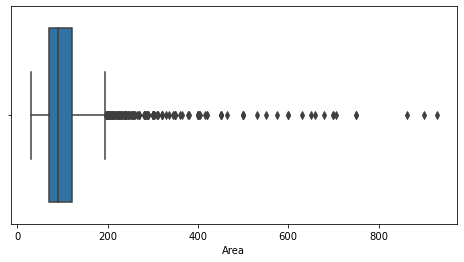

In [93]:
plt.figure(figsize = (8,4))
sns.boxplot(x = df['Area']);

In [94]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(lower , upper)
    return lower, upper

In [ ]:
lower_area , upper_area = lower_upper(df["Area"])
lower_price , upper_price = lower_upper(df["Price(USD)"])

In [96]:
print(df.shape)
df = df[df["Area"] < upper_area]
df = df[df["Price(USD)"] < upper_price]
print(df.shape)

(3450, 8)
(3089, 8)


In [97]:
df.describe()
df.shape

(3089, 8)

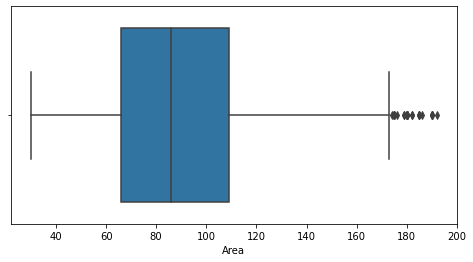

In [98]:
plt.figure(figsize = (8,4))
sns.boxplot(x = df['Area']);

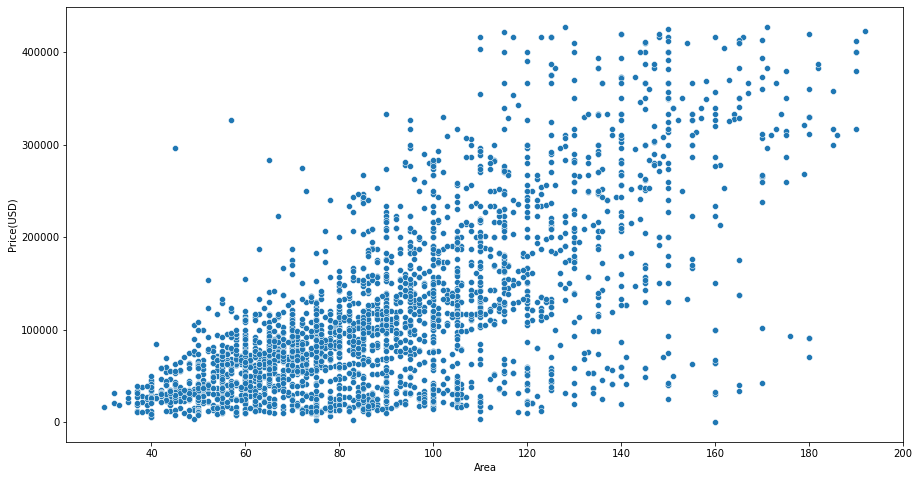

In [99]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df["Area"], df["Price(USD)"]);

In [100]:
address = pd.get_dummies(df["Address"])
address.shape

(3089, 187)

In [101]:
df1 = df.copy()
df1.drop(columns='Address' , inplace=True )
df1.drop(columns="Price" , inplace=True)
df1

,Area,Room,Parking,Warehouse,Elevator,Price(USD)
0,63,1,1,1,1,61666
1,60,1,1,1,1,61666
2,79,2,1,1,1,18333
3,95,2,1,1,1,30083
4,123,2,1,1,1,233333
...,...,...,...,...,...,...
3474,86,2,1,1,1,116666
3475,83,2,1,1,1,226666
3476,75,2,0,0,0,12166
3477,105,2,1,1,1,186666


In [102]:
df1 = df1.merge(address, left_index=True , right_index= True)
df1

,Area,Room,Parking,Warehouse,Elevator,Price(USD),Abazar,Abbasabad,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,61666,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,61666,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,18333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,30083,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,233333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,116666,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83,2,1,1,1,226666,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,75,2,0,0,0,12166,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,105,2,1,1,1,186666,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's Train Our Model!

In [103]:
X = df1.drop(columns="Price(USD)")
y = df1["Price(USD)"]

In [104]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=76)

In [105]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train , y_train)

LinearRegression()

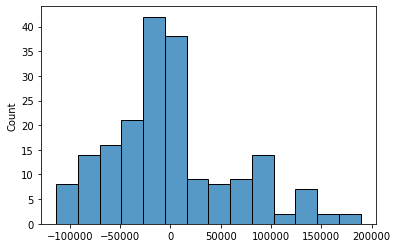

In [106]:
sns.histplot(LR.coef_);

In [107]:
from sklearn.metrics import r2_score
y_predict = LR.predict(X_test)
Linear_R2 = r2_score(y_test,y_predict)
Linear_R2

0.8484711742695161

Let's Try Ridge and Lasso Regression!

In [108]:
from sklearn.linear_model import Ridge
RDG = Ridge(alpha=0.1)
RDG.fit(X_test , y_test)
y_predict_rdg = RDG.predict(X_test)
rdg_r2 = r2_score(y_test , y_predict_rdg)
rdg_r2

0.9053478353967984

<AxesSubplot:ylabel='Count'>

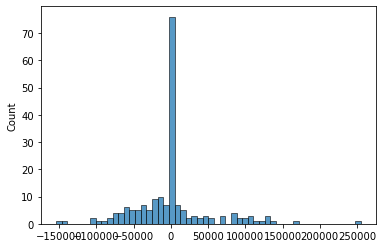

In [109]:
sns.histplot(RDG.coef_)

In [110]:
from sklearn.linear_model import Lasso
LSO = Lasso(alpha=0.01)
LSO.fit(X_train , y_train)
y_predict_lso =  LSO.predict(X_test)

In [111]:
lso_r2 = r2_score(y_test , y_predict_lso)
lso_r2

0.8480771492892734

<AxesSubplot:ylabel='Count'>

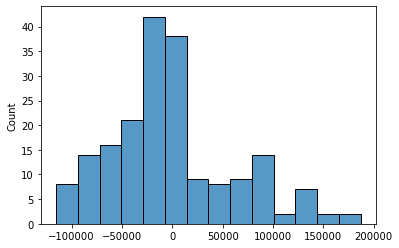

In [112]:
sns.histplot(LSO.coef_)